<a href="https://colab.research.google.com/github/kapibara3chi/Correspondence_Analysis/blob/main/Correspondence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
# !pip install seaborn
# !pip install scikit-learn
!pip install mca
!pip install matplotlib
!pip install japanize-matplotlib
# !pip install prince

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6010 sha256=d482cc8950d2702ea44947545872e13b59dd0b7e04def9afd13b5d569f569ddf
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=cc9d74b57edde169b8a6c074e4fbe54e9331e688681820ecd29785fae3a1b224
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


       チョコレート  バニラ  抹茶
20代男性      30   10  20
20代女性      20   40  10
30代女性      30   40  30
[[-0.45734069 -0.08064163]
 [ 0.37312955 -0.09036941]
 [ 0.01321373  0.11164357]]
[[-0.23522524 -0.11192065]
 [ 0.38813729  0.00505175]
 [-0.26857228  0.14164991]]
----------
[-0.45734069  0.37312955  0.01321373]
[-0.08064163 -0.09036941  0.11164357]
----------
[-0.23522524  0.38813729 -0.26857228]
[-0.11192065  0.00505175  0.14164991]


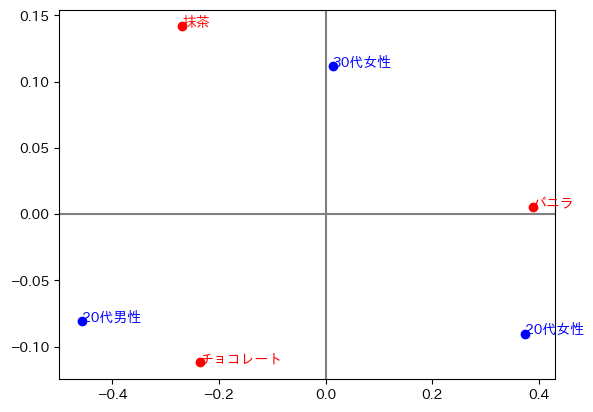

In [9]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt
import japanize_matplotlib

# case: クロス集計表作成
# data = pd.DataFrame({
#     "性別": ["男", "男", "未", "未", "女", "女"],
#     "趣味": ["音楽", "スポーツ", "読書", "音楽", "読書", "映画"]
# })
# print(data)
#cross tableの作成
# table = pd.crosstab(data["性別"], data["趣味"])

#case:read csv
table = pd.read_csv("ice_cream.csv", index_col=0)
print(table)



# 対応分析の実行
mca_counts = mca.MCA(table,benzecri=False)
rows = mca_counts.fs_r(N=2) # 行の座標
cols = mca_counts.fs_c(N=2) # 列の座標

# 散布図の描画
print(rows)
print(cols)
print("-"*10)
print(rows[:, 0])
print(rows[:, 1])
print("-"*10)
print(cols[:, 0])
print(cols[:, 1])
plt.scatter(rows[:, 0], rows[:, 1], c="blue") # 行のプロット
plt.scatter(cols[:, 0], cols[:, 1], c="red") # 列のプロット
plt.axhline(0, color="gray") # 水平軸
plt.axvline(0, color="gray") # 垂直軸

# ラベルの付与
for label, x, y in zip(table.index, rows[:, 0], rows[:, 1]):
    plt.annotate(label, xy=(x, y), c="blue") # 行のラベル
for label, x, y in zip(table.columns, cols[:, 0], cols[:, 1]):
    plt.annotate(label, xy=(x, y), c="red") # 列のラベル

plt.show() # グラフの表示

# 新しいセクション

趣味   スポーツ  映画  読書  音楽
年齢                   
20代     1   0   0   1
30代     1   0   1   0
40代     0   1   0   0
[[ 5.00000000e-01 -7.90569415e-01]
 [ 5.00000000e-01  7.90569415e-01]
 [-2.00000000e+00  5.26625020e-16]]
[[ 5.00000000e-01  2.48253415e-16]
 [-2.00000000e+00  9.65479204e-16]
 [ 5.00000000e-01  1.11803399e+00]
 [ 5.00000000e-01 -1.11803399e+00]]
[ 0.5  0.5 -2. ]
[-7.90569415e-01  7.90569415e-01  5.26625020e-16]


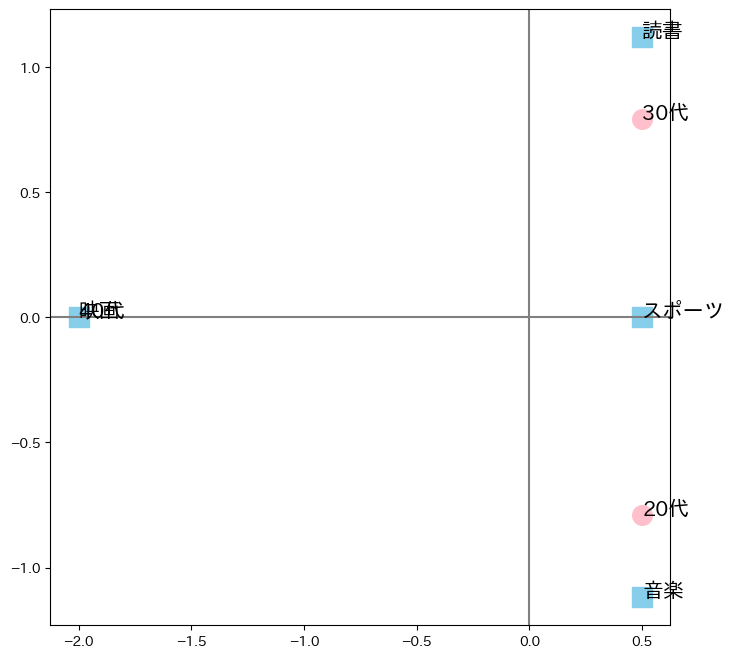

In [27]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt
import japanize_matplotlib

# クロス集計表の作成
df = pd.DataFrame({
    "性別": ["男", "女", "男", "女", "男"],
    "年齢": ["20代", "30代", "40代", "20代", "30代"],
    "趣味": ["スポーツ", "読書", "映画", "音楽", "スポーツ"]
})
ct = pd.crosstab(df["年齢"], df["趣味"])
print(ct)

# mcaでデータを加工
mca_counts = mca.MCA(ct, benzecri=False)
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

print(rows)
print(cols)
print(rows[:, 0])
print(rows[:, 1])
# matplotlibでデータを可視化
fig, ax = plt.subplots(figsize=(8, 8))

# 行の処理
ax.scatter(rows[:, 0], rows[:, 1], c="pink", marker="o", s=200)
labels = ct.index.values
for label, x, y in zip(labels, rows[:, 0], rows[:, 1]):
    ax.annotate(label, xy=(x, y), fontsize=15)

# 列の処理
ax.scatter(cols[:, 0], cols[:, 1], c="skyblue", marker="s", s=200)
labels = ct.columns.values
for label, x, y in zip(labels, cols[:, 0], cols[:, 1]):
    ax.annotate(label, xy=(x, y), fontsize=15)

# 原点（0,0）を引く
ax.axhline(0, color="gray")
ax.axvline(0, color="gray")
plt.show()

  性別    趣味
0  男  スポーツ
1  女    読書
2  男    映画
3  女    音楽
4  男  スポーツ
5  女    映画
趣味  スポーツ  映画  読書  音楽
性別                  
女      0   1   1   1
男      2   1   0   0
[[-0.81649658]
 [ 0.81649658]]
[[ 1.]
 [ 0.]
 [-1.]
 [-1.]]
----------
[-0.81649658  0.81649658]


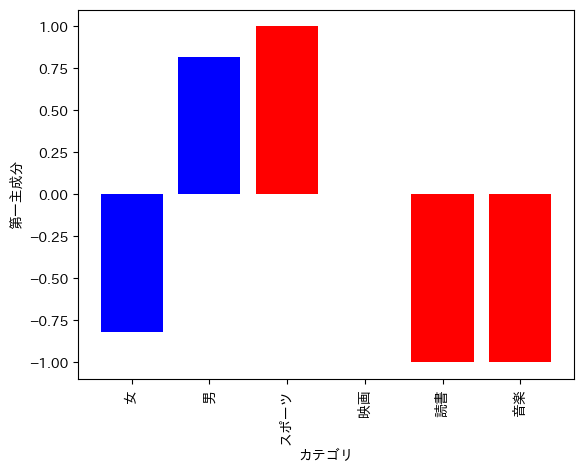

In [31]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt
import japanize_matplotlib

# クロス集計表の作成
df = pd.DataFrame({
    "性別": ["男", "女", "男", "女", "男","女"],
    "趣味": ["スポーツ", "読書", "映画", "音楽", "スポーツ", "映画"]
})
print(df)

table = pd.crosstab(df["性別"], df["趣味"])
print(table)

# 対応分析の実行
mca_counts = mca.MCA(table,benzecri=False)
rows = mca_counts.fs_r(N=2) # 行の座標
cols = mca_counts.fs_c(N=2) # 列の座標

print(rows)
print(cols)
print("-"*10)
print(rows[:, 0])
# print(rows[:, 1])
# 棒グラフの描画
plt.bar(table.index, rows[:, 0], color="blue") # 行のプロット
plt.bar(table.columns, cols[:, 0], color="red") # 列のプロット

# ラベルの付与
plt.xticks(ticks=range(len(table.index) + len(table.columns)), labels=list(table.index) + list(table.columns), rotation=90)
plt.xlabel("カテゴリ")
plt.ylabel("第一主成分")

plt.show() # グラフの表示
